# **Detección de fraudes con tarjetas de credito, usando Scikit-Learn y Snap ML**


## Librerias


Es necesario importar las siguientes librerias para el desarrollo del proyecto:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) para gestionar los datos
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) para operaciones matemáticas.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) para funciones relacionadas con el aprendizaje automático y la canalización de aprendizaje automático.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) para visualizaciones de la data
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) para herramientas de graficación.
*  [`Snap ML`](https://www.zurich.ibm.com/snapml/)  para entrenar y puntuar modelos tradicionales de aprendizaje automático.


Descarga de data: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0RHPEN82-2022-01-01

In [1]:
!pip install snapml

In [2]:
!pip install pandas==1.3.4
!pip install seaborn==0.9.0

### Importamos librerias requeridas


In [3]:
# Importamos librerias
#El módulo de warnings maneja las advertencias en Python
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Librerias para el modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import gc, sys

In [5]:
#Descargar data
datos_crudos = pd.read_csv('creditcard.csv')
datos_crudos

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
#Imprimir las cantidad de observaciones y variables
datos_crudos = pd.read_csv('creditcard.csv')
print("Existen " + str(len(datos_crudos)) + " de observaciones de fraudes de tarjeta de credico.")
print("Existen " + str(len(datos_crudos.columns)) + " variables en datasets.")

# Imprimir el DATAFRAMES
# datos_crudos.head()

Existen 284807 de observaciones de fraudes de tarjeta de credico.
Existen 31 variables en datasets.


Expandiremos el datasets a 10 veces para acercarnos a un escenario real financiero.


In [7]:
n_replicas = 10

# Inflamos la data original
big_datos_crudos = pd.DataFrame(np.repeat(datos_crudos.values, n_replicas, axis=0), columns=datos_crudos.columns)

print("Existen " + str(len(big_datos_crudos)) + " observaciones en la data inflada.")
print("Existen " + str(len(big_datos_crudos.columns)) + " varaibles del dataset.")

# Imprimos el nuevo DATAFRAMES
big_datos_crudos.head()

Existen 2848070 observaciones en la data inflada.
Existen 31 varaibles del dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


**Trabajamos con Class**

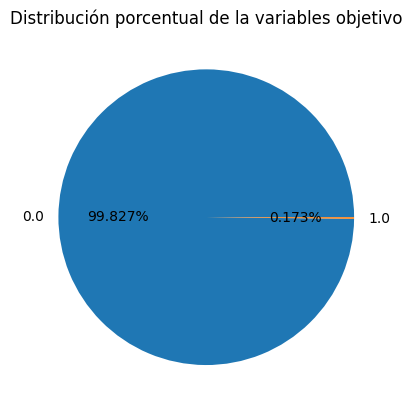

In [8]:
# Distinguimos la clase
labels = big_datos_crudos.Class.unique()

# Contamos la clase
sizes = big_datos_crudos.Class.value_counts().values

# Ploteamos el Target
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Distribución porcentual de la variables objetivo')
plt.show()

Las clases se representan por:

- 0 (Los transacciones con tarjeta de credito son legítimas)  
- 1 (Las transacciones con tarjeta de credito son fraudulentas)

Observamos en el gráfico cirlular que las proporciones de las clases son desiquilibradas. Por tanto se debe normalizar y estadarizar nuestro modelo.


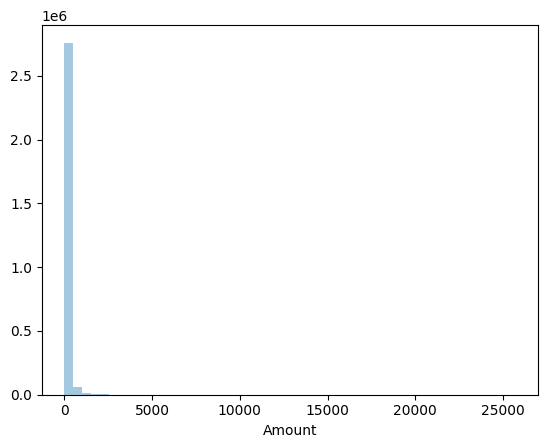

El valor máximo de Amount es  25691.16
El valor mínimo de Amount es  0.0
El 90% de las transacciones tienen un monto menor o igual a  203.0
El 50% de las transacciones tienen un monto menor o igual a  22.0
El 25% de las transacciones tienen un monto menor o igual a  5.6


In [9]:
#ÁNALIZAMOS la variable Amount
#Histograma de montos de transacciones, es decir la variable A
sns.distplot(big_datos_crudos['Amount'], kde=False)
plt.show()

#Imprimimos el máximo
print("El valor máximo de Amount es ", np.max(big_datos_crudos.Amount.values))

#Imprimimos el valor mínimo
print("El valor mínimo de Amount es ", np.min(big_datos_crudos.Amount.values))

#Imprimimos algunos percentiles
print("El 90% de las transacciones tienen un monto menor o igual a ", np.percentile(big_datos_crudos.Amount.values, 90))
print("El 50% de las transacciones tienen un monto menor o igual a ", np.percentile(big_datos_crudos.Amount.values, 50))
print("El 25% de las transacciones tienen un monto menor o igual a ", np.percentile(big_datos_crudos.Amount.values, 25))

## Preparación del DATASETS


Usaremos caling/normalization para acelerar el entrenamiento de nuestro modelo

Estandarizamos las características eliminando la media y escalando a la varianza unitaria


In [10]:
#Excluiremos la columna times
#Normalizamos el entrenamiento
big_datos_crudos.iloc[:, 1:30] = StandardScaler().fit_transform(big_datos_crudos.iloc[:, 1:30])
data_matrix = big_datos_crudos.values

#Generamos la matriz de varaibles independientes
X = data_matrix[:, 1:30]

#Generamos la matriz vector de la variable dependiente y
y = data_matrix[:, 30]

# Normalizamos x con l1
X = normalize(X, norm="l1")

# Imprimimos la dimensión de las matrices
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (2848070, 29) y.shape= (2848070,)


**Ahorramos memoria no necesaria de los DATASETS**


In [11]:
del datos_crudos
del big_datos_crudos
gc.collect()

6437

**Segmentamos Entrenamiento/Prueba**


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)       
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (1993649, 29) Y_train.shape= (1993649,)
X_test.shape= (854421, 29) Y_test.shape= (854421,)


## Árbol de Decisiones


Usaremos los módelos de clasificación:

-Scikit-learn.

-Snap ML.


Calculamos el sample_weights que se utilizará como entrada a la rutina de entrenamiento para que tenga en cuenta el desequilibrio de clase presente en este conjunto de datos.


In [13]:
w_train = compute_sample_weight('balanced', y_train)

Importamos la libreria del modelo de clasificación de Árboles de decisiones.


In [14]:
from sklearn.tree import DecisionTreeClassifier

Instanciamos en una varaible sklearn_dt. 
Parametros:

-4 de profundidad máxima.

-Generador de datos aleatorio de hasta 35.


In [15]:
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

**Calculamos cuando demora el entrenamiento de nuestro modelo Árbol de Decisiones con Scikit-Learn.**


In [16]:
#Usamos el método time
t0 = time.time()
sklearn_dt.fit(X_train, y_train, sample_weight=w_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] tiempo de Entrenamiento (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] tiempo de Entrenamiento (s):  54.50454


**Árbol de decisión con Snap ML**


Import el método de Clasificación de Árbol de Decisiones con Snap ML:

In [17]:
from snapml import DecisionTreeClassifier

Snap ML ofrece entrenamiento de CPU/GPU multiproceso de árboles de decisión, a diferencia de scikit-learn. Para usar la GPU, establezca el parámetro use_gpu = True:


n_jobs lo usamos para establecer el  número de subprocesos de CPU utilizados en el momento del entrenamiento.

Para la salida reproducible en varias llamadas de función, establezca 'random_state', para este caso usaremos 45


In [18]:
#max_ depth= La profundidad máxima del árbol.
#random_state= Controla la aleatoriedad del estimador. 
snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, n_jobs=4)

In [19]:
#Entrenar un modelo de clasificador de árbol de decisiones 
#mediante Snap ML
t0 = time.time()
snapml_dt.fit(X_train, y_train, sample_weight=w_train)
snapml_time = time.time()-t0
print("[Snap ML] Tiempo de entrenamiento (s):  {0:.5f}".format(snapml_time))

[Snap ML] Tiempo de entrenamiento (s):  5.35503


Observamos el rendimiento que tiene **Snap ML** en tiempo de ejecución con respectos a **Scikit Lear**.

**Snap ML** : 68.05 segundos.

**Scikit Lear**: 8.97 segundos

<h3>Evaluamos las clasificadoras de árbol de decisión Scikit-Learn y Snap ML


Examinamos para los dos tipos de modelos: Snap ML vs Scikit-Learn en el entrenamiento.

In [20]:
# Snap ML vs Scikit-Learn aceleración del entrenamiento
#Se calcula la proproción 
training_speedup = sklearn_time/snapml_time
print('[Clasificación del Árbol de Decisiones] Snap ML vs. Scikit-Learn acelerado es : {0:.2f}x '.format(training_speedup))

[Clasificación del Árbol de Decisiones] Snap ML vs. Scikit-Learn acelerado es : 10.18x 


Hagamos una inferencia en ambos clasificadores.
Calculemos las probabilidades de que las muestras de prueba pertenezcan a la clase de transacciones fraudulentas.


In [21]:
#Determinar si la clases es 1, es decir fraudulentas
sklearn_pred = sklearn_dt.predict_proba(X_test)[:,1]
snapml_pred = snapml_dt.predict_proba(X_test)[:,1]

 <h3>ROC-AUC score


ROC-AUC score: es una herramienta estadística que se utiliza para medir el acierto en la predicción de eventos binarios

In [22]:
#Se aplica para la prueba
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

snapml_roc_auc = roc_auc_score(y_test, snapml_pred)   
print('[Snap ML] ROC-AUC score : {0:.3f}'.format(snapml_roc_auc))

[Scikit-Learn] ROC-AUC score : 0.966
[Snap ML] ROC-AUC score : 0.966


**Interpretación**:
El área bajo la curva debe ser un valor comprendido entre 0.5 a 1.

-Donde 1 representa un valor diagnóstico perfecto.

-0,5 es una prueba sin capacidad discriminatoria diagnóstica.

Notamos que nos valores son iguales y muy cercano a 1. Por lo tanto, confirma que la prueba representa un valor disgnostico muy bueno casi llegando a lo perfecto.

## Support Vector Machines


Información de SVM en: 
https://es.wikipedia.org/wiki/M%C3%A1quinas_de_vectores_de_soporte


**Creamos un modelo de máquina de vectores de soporte con Scikit-Learn**

In [23]:
#Importamos libreria requerida
from sklearn.svm import LinearSVC

Creamos una instancia de un modelo SVM de scikit-learn. Para indicar el desequilibrio de la clase en el momento del entrenamiento, establezca `class_weight='balanced'`.

In [24]:
sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

**Entrenamos el modelo SVC de Scikit-Learn**


In [25]:
t0 = time.time()
sklearn_svm.fit(X_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Tiempo de entrenamiento (s):  {0:.2f}".format(sklearn_time))

[Scikit-Learn] Tiempo de entrenamiento (s):  74.32


<div id="svm_snap">
    <h3>Modelo de Vector de Soporte de Maquina para Snap ML</h3>
</div>


Importamos el Support Vector Machine model (SVM) para Snap ML:


In [26]:
from snapml import SupportVectorMachine

A diferencia de LinearSVC de scikit-learn, Snap ML ofrece entrenamiento de CPU/GPU multiproceso de SVM. Para usar la GPU, establezca 'use_gpu = True'. Para establecer el número de subprocesos utilizados en el momento del entrenamiento, es necesario establecer el parámetro 'n_jobs'.

In [27]:
snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, n_jobs=4, fit_intercept=False)
print(snapml_svm.get_params())

{'class_weight': 'balanced', 'device_ids': [], 'fit_intercept': False, 'gamma': 1.0, 'generate_training_history': None, 'intercept_scaling': 1.0, 'kernel': 'linear', 'loss': 'hinge', 'max_iter': 1000, 'n_components': 100, 'n_jobs': 4, 'normalize': False, 'random_state': 25, 'regularizer': 1.0, 'tol': 0.001, 'use_gpu': False, 'verbose': False}


Entrenamiento del modelo SVM, usando Snap ML:


In [28]:
t0 = time.time()
model = snapml_svm.fit(X_train, y_train)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s):  {0:.2f}".format(snapml_time))

[Snap ML] Training time (s):  10.13


<div id="svm_sklearn_snap">
    <h3>Evaluamos Scikit-Learn y Snap ML en el Modelo SVM</h3>
</div>


Examinemos la aceleración de entrenamiento de Snap ML vs Scikit-Learn para los modelos SVM:


In [29]:
# compute the Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : {0:.2f}x '.format(training_speedup))

[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : 7.34x 


Let's run inference on both models and get the confidence scores of the test samples. 


In [30]:
sklearn_pred = sklearn_svm.decision_function(X_test)
snapml_pred = snapml_svm.decision_function(X_test)

We evaluate the **ROC-AUC score** of the predictions of both models:


In [31]:
acc_sklearn  = roc_auc_score(y_test, sklearn_pred)
print("[Scikit-Learn] ROC-AUC score:   {0:.3f}".format(acc_sklearn))

acc_snapml  = roc_auc_score(y_test, snapml_pred)
print("[Snap ML] ROC-AUC score:   {0:.3f}".format(acc_snapml))

[Scikit-Learn] ROC-AUC score:   0.984
[Snap ML] ROC-AUC score:   0.985


-Ambos ROUC-AUC muestran los mismo valores acercandose a 1, lo que significa que  que hay 98% de probabilidad de que el modelo pueda distinguir entre clase positiva y clase negativa.

El modelo Snap ML ejecuta la rutina de entrenamiento más rápido que Scikit-Learn. 

De esta manera se puede tomar la decisión de cúal modelo usar, ya sea por rápidez de respuesta o preferencia en el uso de librerias.
